# M1 Preprocessing on Debbie's Filtered dataset

## Add metadata to Anndata 

so we can see which cells match with Debbie's analysis. 


In [1]:
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
# sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb

In [2]:
adata = sc.read_h5ad('../../data/M1/adata_01.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 5772 × 14120
    obs: 'doublet_scores', 'predicted_doublets', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'M', 'E', 'clusters_gradients', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'mito', 'pct_dropout_by_counts', 'ambient'
    uns: 'clusters_gradients_colors', 'neighbors', 'pca', 'phase_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'raw_counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [4]:
meta = pd.read_csv("../../metadata_final.csv", header = 0, index_col=0)

We'll count up how many cells are in M2, since the metadata file contains M1 and M2.

In [5]:
from collections import Counter

Counter([i.split('-')[1] for i in meta.index])

Counter({'1': 5060, '2': 4388})

In [6]:
meta_m1 = meta.loc[meta['sample'] == 1]

In [7]:
adata.obs['brcd'] = None

In [9]:
meta_m1['brcd'] = 0

In [10]:
for x in meta_m1.index:    
    for y in adata.obs.index:
        x_brcd = x.split('-')[0]
        y_brcd = y.split(':')[1][:-1]
        if x_brcd == y_brcd:
            meta_m1.loc[x,'brcd'] = x_brcd
            adata.obs.loc[y,'brcd'] = x_brcd


In [11]:
adata.obs

,doublet_scores,predicted_doublets,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,M,E,clusters_gradients,S_score,G2M_score,phase,cell_cycle_diff,brcd
CellID,,,,,,,,,,,,,,
gex_possorted_bam_SJSO3:AAACCGGCAGCCTAACx,0.325527,False,603,815,603.0,407.999969,-0.006214,-0.015669,E,-0.017067,-0.019062,G1,0.001994,AAACCGGCAGCCTAAC
gex_possorted_bam_SJSO3:AAAGCCGCACCCACCTx,0.201268,False,693,1079,693.0,408.000000,-0.008350,-0.001857,E,-0.004284,0.003913,G2M,-0.008196,AAAGCCGCACCCACCT
gex_possorted_bam_SJSO3:AAAGCACCAGGACACAx,0.055944,False,309,249,309.0,406.679535,-0.005963,-0.009741,E,-0.004338,-0.004152,G1,-0.000186,None
gex_possorted_bam_SJSO3:AAAGCGGGTACAAAGAx,0.297180,False,448,686,448.0,408.000000,-0.010380,-0.000712,E,-0.013214,0.000794,G2M,-0.014008,None
gex_possorted_bam_SJSO3:AAACGTACAGGACCAAx,0.063197,False,487,551,487.0,407.999969,-0.009756,-0.001111,E,-0.001479,-0.013220,G1,0.011741,AAACGTACAGGACCAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gex_possorted_bam_SJSO3:TTTGCGGAGGCGCTACx,0.045977,False,328,341,328.0,407.999969,-0.001620,-0.009722,E,-0.010513,0.010016,G2M,-0.020529,None
gex_possorted_bam_SJSO3:TTTGGTGCAATTGCGCx,0.022908,False,299,244,299.0,406.635498,-0.007811,-0.011988,E,0.012889,0.028124,G2M,-0.015235,None
gex_possorted_bam_SJSO3:TTTGTCTAGTCATCCCx,0.224138,False,1083,1382,1083.0,407.623322,0.006975,0.005211,M,0.005763,-0.003821,S,0.009584,TTTGTCTAGTCATCCC


In [12]:
meta_m1

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,barcode,...,NE_score1,identity,non.NE_score1,comb.score,S.Score,G2M.Score,Phase,old.ident,wsnn_res.0.5,brcd
AAACAGCCAAAGCGGC-1,SeuratProject,845,282,7896,3864,0.681760,0.67,8.753409,0.80,AAACAGCCAAAGCGGC,...,-0.242737,NE_2,0.000000,-0.242737,0.039616,-0.037981,S,NE_2,2,0
AAACAGCCACCTATAG-1,SeuratProject,6922,2338,53518,21699,0.857939,0.97,5.769329,0.13,AAACAGCCACCTATAG,...,-0.354737,NE_1,-0.099396,-0.255340,0.149260,0.314904,G2M,NE_7,1,AAACAGCCACCTATAG
AAACAGCCATAGACCC-1,SeuratProject,3929,1433,21912,9778,0.584779,0.26,7.417687,0.52,AAACAGCCATAGACCC,...,-0.267384,NE_10,-0.171067,-0.096318,0.087035,-0.052885,S,NE_6,12,AAACAGCCATAGACCC
AAACATGCAACTGGCT-1,SeuratProject,1119,407,11301,5256,0.809033,0.93,6.793207,0.35,AAACATGCAACTGGCT,...,-0.409866,NE_10,0.000000,-0.409866,0.130652,0.132692,G2M,NE_7,12,AAACATGCAACTGGCT
AAACATGCAATGAAGC-1,SeuratProject,2634,998,20382,9314,0.817627,0.94,7.077507,0.43,AAACATGCAATGAAGC,...,-0.717662,NE_2,-0.083178,-0.634484,-0.082033,-0.124038,G1,NE_2,2,AAACATGCAATGAAGC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGGTTTGAC-1,SeuratProject,1813,722,10487,5042,0.654740,0.56,8.017225,0.67,TTTGTGAAGGTTTGAC,...,-0.435870,Club cells_1,-0.171067,-0.264803,0.026811,-0.100962,S,Club cells_1,0,TTTGTGAAGGTTTGAC
TTTGTGAAGTCATCCC-1,SeuratProject,5885,2218,3758,1920,0.677665,0.65,6.763449,0.34,TTTGTGAAGTCATCCC,...,-0.446732,Club cells_2,-0.182574,-0.264158,-0.217087,-0.283173,G1,Club cells_1,7,TTTGTGAAGTCATCCC
TTTGTGGCAGAAACGT-1,SeuratProject,1309,446,6596,3264,0.586735,0.27,5.979021,0.17,TTTGTGGCAGAAACGT,...,-0.353641,NE_3,-0.027726,-0.325915,-0.045618,0.005288,G2M,NE_3,3,TTTGTGGCAGAAACGT
TTTGTGTTCCCGTTGT-1,SeuratProject,1246,493,6472,3223,0.730294,0.81,6.216568,0.21,TTTGTGTTCCCGTTGT,...,-0.377275,NE_2,-0.166355,-0.210920,-0.026010,-0.014904,G1,NE_2,2,TTTGTGTTCCCGTTGT


In [13]:
new_adata_obs = adata.obs.merge(meta_m1, how = 'left',on='brcd')


In [14]:
new_adata_obs.index = adata.obs.index

In [15]:
adata.obs = new_adata_obs

In [16]:
adata.obs

,doublet_scores,predicted_doublets,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,M,E,clusters_gradients,S_score,...,nFeature_gene_activity,NE_score1,identity,non.NE_score1,comb.score,S.Score,G2M.Score,Phase,old.ident,wsnn_res.0.5
CellID,,,,,,,,,,,,,,,,,,,,,
gex_possorted_bam_SJSO3:AAACCGGCAGCCTAACx,0.325527,False,603,815,603.0,407.999969,-0.006214,-0.015669,E,-0.017067,...,6642.0,-0.534705,NE_1,-0.055452,-0.479253,-0.055022,-0.117308,G1,NE_5,1.0
gex_possorted_bam_SJSO3:AAAGCCGCACCCACCTx,0.201268,False,693,1079,693.0,408.000000,-0.008350,-0.001857,E,-0.004284,...,7396.0,0.108774,NE_4,0.609970,-0.501196,-0.005602,-0.119231,G1,NE_5,4.0
gex_possorted_bam_SJSO3:AAAGCACCAGGACACAx,0.055944,False,309,249,309.0,406.679535,-0.005963,-0.009741,E,-0.004338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gex_possorted_bam_SJSO3:AAAGCGGGTACAAAGAx,0.297180,False,448,686,448.0,408.000000,-0.010380,-0.000712,E,-0.013214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gex_possorted_bam_SJSO3:AAACGTACAGGACCAAx,0.063197,False,487,551,487.0,407.999969,-0.009756,-0.001111,E,-0.001479,...,4846.0,-0.553258,Club cells_1,-0.127122,-0.426136,0.007203,-0.111058,S,Club cells_1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gex_possorted_bam_SJSO3:TTTGCGGAGGCGCTACx,0.045977,False,328,341,328.0,407.999969,-0.001620,-0.009722,E,-0.010513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gex_possorted_bam_SJSO3:TTTGGTGCAATTGCGCx,0.022908,False,299,244,299.0,406.635498,-0.007811,-0.011988,E,0.012889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gex_possorted_bam_SJSO3:TTTGTCTAGTCATCCCx,0.224138,False,1083,1382,1083.0,407.623322,0.006975,0.005211,M,0.005763,...,5168.0,-0.528765,NE_2,-0.083178,-0.445587,0.034214,-0.160096,S,NE_2,2.0


... storing 'brcd' as categorical
... storing 'orig.ident' as categorical
... storing 'barcode' as categorical
... storing 'identity' as categorical
... storing 'Phase' as categorical
... storing 'old.ident' as categorical


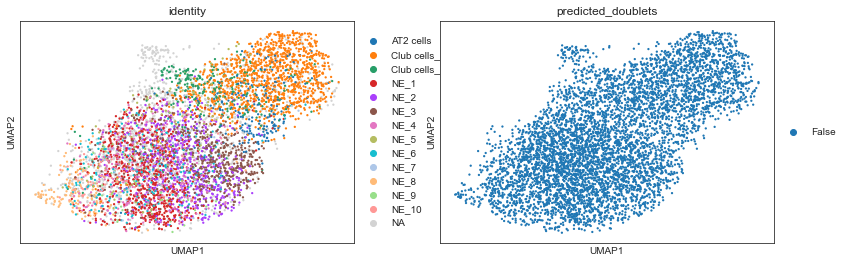

In [17]:
sc.pl.umap(adata, color = ['identity', 'predicted_doublets'])

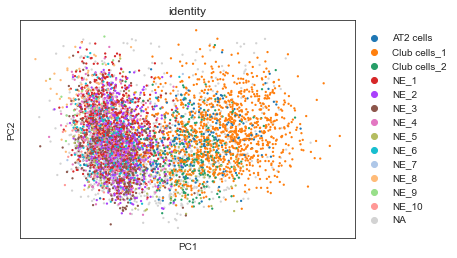

In [18]:
sc.pl.pca(adata, color = 'identity')

## Filter AnnData to Debbie's subset

In [19]:
adata.obs.identity.describe()

count             4520
unique              13
top       Club cells_1
freq              1123
Name: identity, dtype: object

In [20]:
adata.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5772 entries, gex_possorted_bam_SJSO3:AAACCGGCAGCCTAACx to gex_possorted_bam_SJSO3:TTTGTCCCAATCGCACx
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   doublet_scores           5772 non-null   float64 
 1   predicted_doublets       5772 non-null   category
 2   initial_size_spliced     5772 non-null   uint64  
 3   initial_size_unspliced   5772 non-null   uint64  
 4   initial_size             5772 non-null   float32 
 5   n_counts                 5772 non-null   float32 
 6   M                        5772 non-null   float64 
 7   E                        5772 non-null   float64 
 8   clusters_gradients       5772 non-null   category
 9   S_score                  5772 non-null   float64 
 10  G2M_score                5772 non-null   float64 
 11  phase                    5772 non-null   category
 12  cell_cycle_diff          5772 non-null   float

This shows that my analysis from Notebook 1a had 5165 cells, whereas adding the information from Debbie's analysis gave info for 4388 cells. We will subset the data to match hers below.

In [21]:
adata = adata[adata.obs.dropna().index,]

In [22]:
adata

View of AnnData object with n_obs × n_vars = 4520 × 14120
    obs: 'doublet_scores', 'predicted_doublets', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'M', 'E', 'clusters_gradients', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'brcd', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'barcode', 'sample', 'ATAC_snn_res.0.5', 'seurat_clusters', 'nCount_peaks', 'nFeature_peaks', 'peaks_snn_res.0.5', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'SCT.weight', 'peaks.weight', 'nCount_Imputed_counts', 'nFeature_Imputed_counts', 'nCount_gene_activity', 'nFeature_gene_activity', 'NE_score1', 'identity', 'non.NE_score1', 'comb.score', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'wsnn_res.0.5'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'mito', 'pct_dropout_by_counts', 'ambient'
    uns: 'clus

In [23]:
adata.write_h5ad('../../data/M1/adata_01_filtered.h5ad')

## Add Debbie's UMAP

Add the UMAP coordinates from Debbie's analysis, which was generated after Harmony correcting M1 and M2 for both ATAC (on lsi reduction of peaks data, harmony_1) and RNA (on SCTransformed data, harmony_2), and then using scATAC and scRNA together (via Multimodal Neighbor Analysis in Seurat, WNN).

In [25]:
umap = pd.read_csv('../M2/debbie_umap.csv', header = 0, index_col=0)

In [26]:
umap_1 = umap.loc[[i for i in umap.index if i[-1] == '1']]
umap_2 = umap.loc[[i for i in umap.index if i[-1] == '2']]

In [29]:
umap_1.index = [i[:-2] for i in umap_1.index]

In [30]:
umap_1

,wnnumap_1,wnnumap_2
AAACAGCCAAAGCGGC,-8.998579,-1.467256
AAACAGCCACCTATAG,-5.396116,-4.650607
AAACAGCCATAGACCC,-3.410541,4.404583
AAACATGCAACTGGCT,-3.385606,3.363393
AAACATGCAATGAAGC,-8.876200,-1.615253
...,...,...
TTTGTGAAGGTTTGAC,12.938601,2.788586
TTTGTGAAGTCATCCC,11.773226,2.535540
TTTGTGGCAGAAACGT,-7.365902,2.091921
TTTGTGTTCCCGTTGT,-8.646102,-0.649009


In [31]:
umap_list_x = []
umap_list_y = []


for i, r in adata.obs.iterrows():
    adata_label = i.split(':')[1][:-1]
    if adata_label in umap_1.index:
        umap_list_x.append(umap_1.loc[adata_label,'wnnumap_1'])
        umap_list_y.append(umap_1.loc[adata_label,'wnnumap_2'])


In [32]:
umap_1 = np.array([umap_list_x, umap_list_y]).T

In [33]:
adata.obsm['X_umap_wnn'] = umap_1

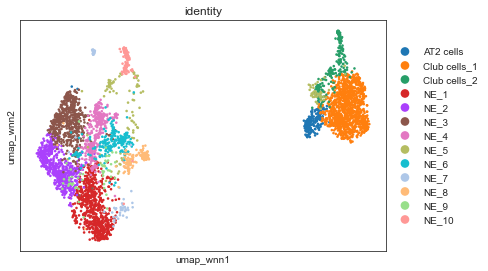

In [34]:
sc.pl.scatter(adata, basis = "umap_wnn", color = "identity")

In [35]:
adata.write_h5ad('../../data/M1/adata_01_filtered.h5ad')

Note: It seems some cells in the non-NE cluster are alabeled as NE_5.

(array([ 808., 1333.,  678.,   84.,    0.,    0.,    0.,    0.,  528.,
        1089.]),
 array([-10.18617324,  -7.6308647 ,  -5.07555617,  -2.52024764,
          0.03506089,   2.59036943,   5.14567796,   7.70098649,
         10.25629503,  12.81160356,  15.36691209]),
 <BarContainer object of 10 artists>)

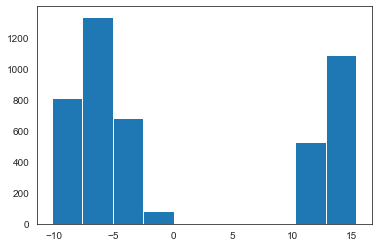

In [39]:
plt.hist(umap_list_x)

In [43]:
right_cluster = []
for x in umap_list_x:
    if x > 5:
        right_cluster.append(True)
    else:
        right_cluster.append(False)

In [45]:
adata.obs['right_cluster'] = right_cluster

In [50]:
adata.obs.loc[(adata.obs.right_cluster == True)&(adata.obs.identity == 'NE_5')].to_csv("right_cluster_Debbie_umap.csv")